<a href="https://colab.research.google.com/github/RubenGres/Seg2Sat/blob/main/Seg2Sat_inference_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook from the [Seg2Sat model](https://github.com/RubenGres/Seg2Sat)

In [1]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
from diffusers import StableDiffusionControlNetPipeline
from diffusers.utils import load_image
import torch

/home/innani/miniconda3/envs/Seg2Sat-Training/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Garante que estamos usando a GPU
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(f"Usando dispositivo: {device}")

# Caminho para o seu modelo que foi treinado. 
# Como o notebook está na pasta raiz, este é o caminho relativo correto.
caminho_do_modelo_local = "./finetuning/controlnet_training/model_pinus_finetuned"

# Carregando o SEU ControlNet local
print(f"Carregando ControlNet de: {caminho_do_modelo_local}")
controlnet = ControlNetModel.from_pretrained(caminho_do_modelo_local, torch_dtype=torch.float16).to(device)

# Carregando o pipeline do Stable Diffusion com o SEU ControlNet
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1-base", controlnet=controlnet, torch_dtype=torch.float16
).to(device)

print("✅ Modelos carregados com sucesso!")
# ==============================================================================


Usando dispositivo: cuda:0
Carregando ControlNet de: ./finetuning/controlnet_training/model_pinus_finetuned


Loading pipeline components...: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:17<00:00,  2.87s/it]


✅ Modelos carregados com sucesso!


In [6]:
# ==============================================================================
#           CÉLULA DE INFERÊNCIA (CORRIGIDA)
# ==============================================================================
from PIL import Image

# 1. ESCOLHA UMA DAS SUAS MÁSCARAS
#    Substitua '1.png' pelo nome de um dos seus arquivos de máscara que tenha a cor roxa.
caminho_da_mascara = "pinus_dataset/test.png"
image = Image.open(caminho_da_mascara)

# 2. CRIE UM PROMPT COM A PALAVRA "PINUS"
#    Isso ajuda o modelo a saber o que gerar.
prompt = "Aerial view of a forest with pinus trees in Paraná, Brazil. photorealistic, 4k, high detail."

# 3. EXECUTE A INFERÊNCIA
#    (Opcional: Mude o número da 'seed' para obter resultados diferentes a cada execução)
generator = torch.Generator(device=device).manual_seed(1024)
image = pipe(
   prompt=prompt, 
   num_inference_steps=30,  # Aumentei um pouco para mais detalhes no resultado
   image=image,
   generator=generator,
).images[0]

image.save("image_test.png")
print("✅ Inferência concluída.")
# ==============================================================================

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:05<00:00,  5.97it/s]


✅ Inferência concluída.


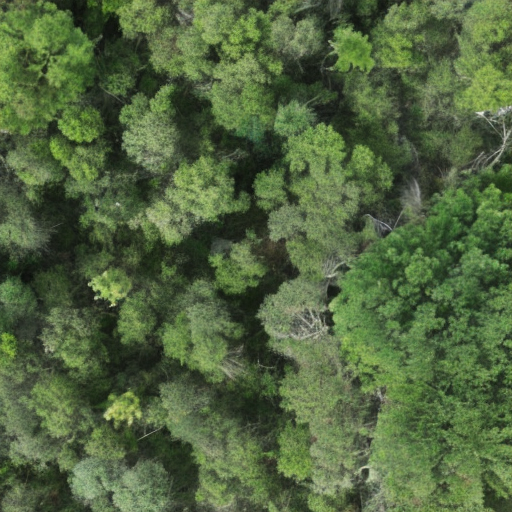

In [7]:
image